In [8]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt
from scipy import integrate, linalg

In [2]:
#system definition
def xdot(A,B1,B2,x,w,u,t):
    return A.dot(x) + B1.dot(w) + B2.dot(u) #state
def z(C,D1,D2,x,w,u,t):
    return C.dot(x) + D1.dot(w) + D2.dot(u) #output

In [3]:
x0 = [np.random.rand(),np.random.rand()]
print(x0)
w = 1
u = 1
A = np.array([[0,1],[-1,0]])
C = np.array([[1,0]])
B1,B2 = np.array([0,1]).T,np.array([0,1]).T
print(B1.dot(w))
np.shape(A)

[0.9411046794233728, 0.1540471853533132]
[0 1]


(2, 2)

In [ ]:
x_t = integrate.solve_ivp(xdot, [0,10], x0, t_eval = np.linspace(0,10,100),args = (A,B1,B2,w,u),vectorized=True)
print(len(x_t.y))

In [6]:
#lets play with integrating a normal 1D system to see what we are doing wrong: 
def xdot1d(t,x,a,u):
    return -a*x + u

#initialize random x0: 
#x01d = np.random.rand()
x01d = [7]
print(x01d)

[7]


In [8]:
a, u = 1, 3 #initializing parameters
xsol = integrate.solve_ivp(xdot1d,[0,10],x01d,t_eval=np.linspace(0,10,1000),args=(a,u))
xsol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 50
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0.        ,  0.01001001,  0.02002002,  0.03003003,  0.04004004,
        0.05005005,  0.06006006,  0.07007007,  0.08008008,  0.09009009,
        0.1001001 ,  0.11011011,  0.12012012,  0.13013013,  0.14014014,
        0.15015015,  0.16016016,  0.17017017,  0.18018018,  0.19019019,
        0.2002002 ,  0.21021021,  0.22022022,  0.23023023,  0.24024024,
        0.25025025,  0.26026026,  0.27027027,  0.28028028,  0.29029029,
        0.3003003 ,  0.31031031,  0.32032032,  0.33033033,  0.34034034,
        0.35035035,  0.36036036,  0.37037037,  0.38038038,  0.39039039,
        0.4004004 ,  0.41041041,  0.42042042,  0.43043043,  0.44044044,
        0.45045045,  0.46046046,  0.47047047,  0.48048048,  0.49049049,
        0.5005005 ,  0.51051051,  0.52052052,  0.53053053,  0.54054054,
        0.55055055,  0.5605605

10.0
[7.         6.96015969 6.92071619 6.88166555 6.84300386 6.80472724
 6.76683187 6.72931394 6.6921697  6.65539541 6.61898739 6.582942
 6.54725091 6.51190221 6.47689311 6.44222106 6.40788349 6.37387787
 6.34020164 6.30685227 6.27382723 6.24112401 6.20874007 6.17667292
 6.14492006 6.11347898 6.08234721 6.05152226 6.02100165 5.99078292
 5.96086361 5.93124126 5.90191343 5.87287767 5.84413156 5.81567266
 5.78749856 5.75960685 5.73199511 5.70466095 5.67760198 5.65081581
 5.62430006 5.59805236 5.57207034 5.54635165 5.52089394 5.49569485
 5.47075206 5.44606323 5.42162604 5.39743816 5.3734973  5.34980114
 5.32634739 5.30313376 5.28015797 5.25741773 5.23491079 5.21263487
 5.19058772 5.16876709 5.14717074 5.12579644 5.10464195 5.08370506
 5.06298354 5.0424752  5.02217782 5.00208922 4.98220721 4.9625296
 4.94305422 4.92377891 4.90470151 4.88581985 4.8671318  4.84863521
 4.83032796 4.81220791 4.79427294 4.77652095 4.75894983 4.74155747
 4.72434179 4.70730071 4.69043213 4.67373399 4.65720423 4.64

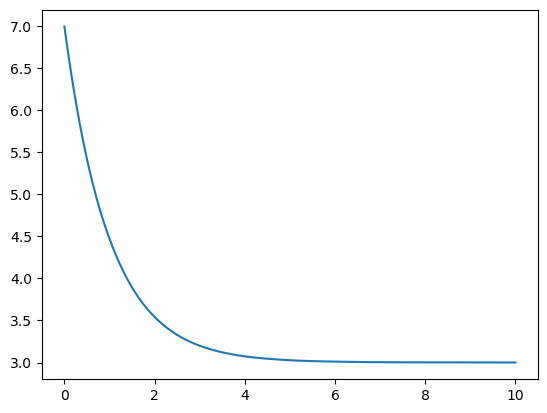

In [16]:
print(xsol.t[-1])
print(xsol.y[0])
plt.plot(xsol.t,xsol.y[0])

In [3]:
#ex 201. Robust output tracking via state feedback with full state information:
A = np.array([[0,1],[-1,0]])
B1 = np.array([0,1])
B2 = np.array([0,1])
C = np.array([1,0])
w = [np.random.rand()]
print(w)

[0.17680533336227733]


In [7]:
#simulating the uncontrolled but constantly disturbed system:
def xdot(t,x,A,B1):
    return A.dot(x) + B1*w

In [17]:
#initial conditions
x0 = np.random.randn(2)
print(x0)

[ 1.02529065 -1.3930816 ]


In [18]:
x_t = integrate.solve_ivp(xdot,y0=x0,t_span=[0,10],args=(A,B1),t_eval=np.linspace(0,10,1000))
x_t.y

array([[ 1.02529065,  1.01130361,  0.99723296, ...,  0.19457949,
         0.21090288,  0.22722285],
       [-1.3930816 , -1.40150501, -1.409788  , ...,  1.63082223,
         1.63056255,  1.63013953]])

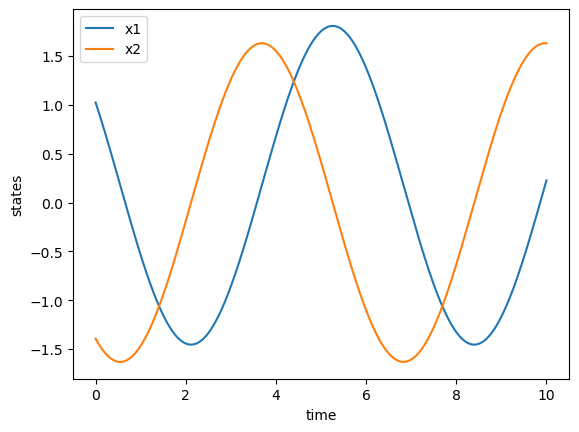

In [19]:
#plotting
plt.plot(x_t.t,x_t.y[0],label='x1')
plt.plot(x_t.t,x_t.y[1],label='x2')
plt.xlabel("time")
plt.ylabel("states")
plt.legend()
plt.show()

In [83]:
#Now let's look at the controlled system. 
#u = Kx where K = [k1,k2,ki] (since the augmented state is [x1,x2,xI])
# ****How to find the coefficients k analytically is now the question.****
''' some testing I had to do for b.s. dimension compatibility issues.
G = ct.tf2ss([1], [1, 2, 3])
print(G.A)
print(G.B)
'''
ch_contrl = ct.ctrb(A,[[B2[0]],[B2[1]]]) #controllability check
print(ch_contrl)
#print(np.linalg.matrix_rank(np.vstack(np.hstack((A,B2)),np.hstack((C,np.array([0]))))))
#np.hstack((A,B2.T))
# **** The coefficients k which were found by hand in this case can be 0.5,-2,-3. Basically k1 < 1; k2 and KI < 0 each.
K = np.array([0.5,-2,-3])
r = 7 #let this be the output to be tracked. 
#Closed loop system definition: 
def xdotcl(t,xhat,A,B2,B1,K,w):
    Ahat = np.vstack((np.hstack((A,np.array([0,0]).reshape(2,1))),np.hstack((C.reshape(1,2),np.array([0]).reshape(1,1)))))
    B1hat = np.vstack((np.hstack((B1.reshape(2,1),np.array([0,0]).reshape(2,1))),np.array([0,-1])))
    B2hat = np.vstack((B2.reshape(2,1),[0]))
    what = np.vstack((w,r))
    return (Ahat + B2hat.dot(K.reshape(1,3)))@xhat + B1hat @ what

[[0. 1.]
 [1. 0.]]


In [102]:
#simulating the closed loop system. We let xI0 be random too
xhat0 = np.random.rand(3) * 3
print(xhat0)

[2.3492984  1.35900441 2.78749278]


In [103]:
xcl = integrate.solve_ivp(xdotcl,y0=xhat0,t_span=[0,10],args=(A,B2,B1,K,w),t_eval=np.linspace(0,10,10000),vectorized=True)

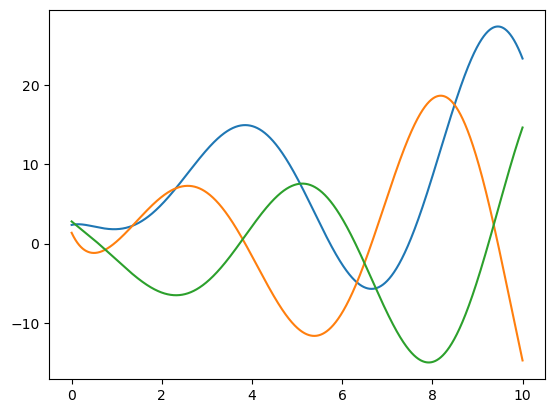

In [104]:
#plotting results of closed loop simulation
plt.plot(xcl.t,xcl.y[0])
plt.plot(xcl.t,xcl.y[1])
plt.plot(xcl.t,xcl.y[2])

plt.show()

In [48]:
print(np.random.rand(3,1))
print(np.random.rand(3)) #bruh so these two are so different. PBUH

[[0.65743881]
 [0.48141574]
 [0.97721187]]
[4.96527594e-01 4.37171731e-01 1.75144556e-04]


In [50]:
new_array = np.ravel(np.random.randn(3,1)).reshape(3,1)
new_array

array([[-0.85270916],
       [-2.06436331],
       [-1.58927154]])

In [107]:
print(B2hat.dot(K.reshape(1,3)))
print(Ahat)
print(Ahat + B2hat.dot(K.reshape(1,3)))

[[ 0.   0.   0. ]
 [ 0.5 -2.  -3. ]
 [ 0.   0.   0. ]]
[[ 0  1  0]
 [-1  0  0]
 [ 1  0  0]]
[[ 0.   1.   0. ]
 [-0.5 -2.  -3. ]
 [ 1.   0.   0. ]]


## Implementations for climax: output feedback <a name ="Output Feedback control"></a>

In [25]:
#Import all the modules you need for this section
import numpy as np
import control as ct
import matplotlib.pyplot as plt
from scipy import integrate, linalg 

### Simple systems - uncontrolled

In [2]:
#system definition and initial vector initialization
A = np.array([[0,1],[1,0]])
B = np.array([[0],[1]])
C = np.array([-2,1])
x0 = np.random.rand(2,1)*37
print(x0)

[[ 0.76746373]
 [29.9241357 ]]


In [3]:
#first lets simulate the uncontrolled system to observe its behaviour: 
def xdotunctrl(t,x,A):
    return A.dot(x)
def unctrloutput(C,x):
    return C.dot(x)

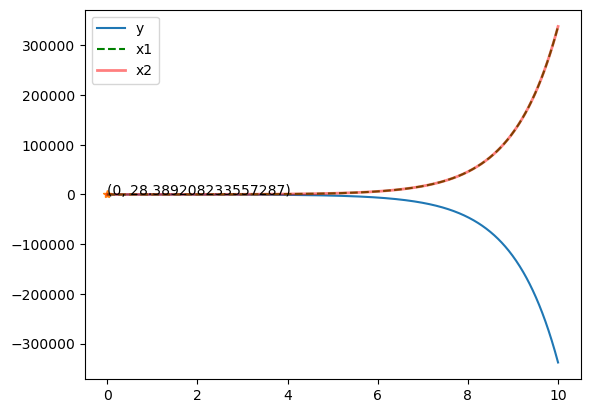

In [24]:
x_t = integrate.solve_ivp(xdotunctrl,t_span=[0,10],y0=x0.reshape(2),args=[A],t_eval=np.linspace(0,10,1000),vectorized=True)
y = -2*x_t.y[0] + x_t.y[1] #manually calculcating y
#y = unctrloutput(C,x_t.y) #calculating y with the function we defined lol
fig,ax = plt.
plt.plot(x_t.t,y,label='y')
plt.plot(0,y[0],'*')
plt.text(0,y[0],f'(0, {y[0]})') #coordinates of start point.
plt.plot(x_t.t,x_t.y[0],'g--',label='x1')
plt.plot(x_t.t,x_t.y[1],'r-',alpha = 0.5,label='x2',linewidth=2)
plt.legend()
plt.show()

### Controlled system

In [48]:
#let's do the controlled system now: 
def youtctrl(C,x):
    return C.dot(x)

def xdotctrl(t,x,A,B,C,K):
    return A.dot(x) + K * np.matmul(B,C.reshape(2,1).T).dot(x) 

In [47]:
np.matmul(B,C.reshape(2,1).T)

array([[ 0,  0],
       [-2,  1]])

In [55]:
#initializing system values like before:
#system definition and initial vector initialization
A = np.array([[0,1],[0,-1]])
B = np.array([[0],[1]])
C = np.array([-2,1])
K = 1
x0 = np.random.rand(2)*7
print(x0)

[6.20543512 4.10887478]


In [56]:
xctrl = integrate.solve_ivp(xdotctrl,t_span=[0,10],y0 = x0,t_eval=np.linspace(0,10,1000),args = (A,B,C,K),vectorized=True)

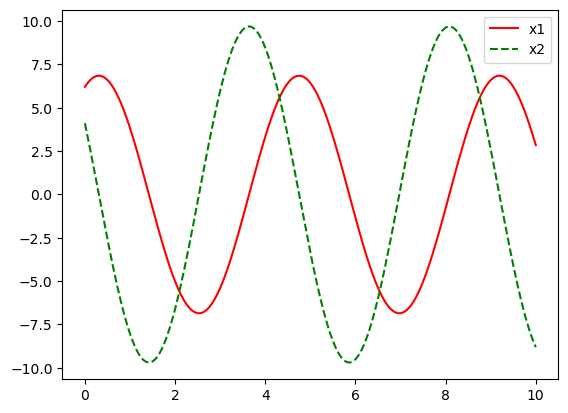

In [57]:
plt.plot(xctrl.t,xctrl.y[0],'r',label="x1")
plt.plot(xctrl.t,xctrl.y[1],'g--',label="x2")
plt.legend()
plt.show()